
# **Entrega Final  – Versión Pedagógica**

**Datasets:** `ventas.csv`, `clientes.csv`, `marketing.csv` (en Drive).

### Mapeo a la rúbrica
###Etapa 1: Recopilación y Preparación de Datos
1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.
4. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.
5. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.
###Etapa 2: Preprocesamiento y Limpieza de Datos
1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.
2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.
4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
###Etapa 3: Análisis de Datos
1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.
2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.
3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.
###Etapa 4: Visualización de Datos
1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión)
2. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.
4. Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.



## Etapa1: 1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.

In [71]:
import numpy as np
import io
from urllib.request import urlopen
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#Definición de URLs
urls = {
    "clientes":  "https://raw.githubusercontent.com/elkingdavis/Analisis_de_datos_PY_202510_EDV/main/clientes.csv",
    "marketing": "https://raw.githubusercontent.com/elkingdavis/Analisis_de_datos_PY_202510_EDV/main/marketing.csv",
    "ventas":    "https://raw.githubusercontent.com/elkingdavis/Analisis_de_datos_PY_202510_EDV/main/ventas.csv",
}
urls

{'clientes': 'https://raw.githubusercontent.com/elkingdavis/Analisis_de_datos_PY_202510_EDV/main/clientes.csv',
 'marketing': 'https://raw.githubusercontent.com/elkingdavis/Analisis_de_datos_PY_202510_EDV/main/marketing.csv',
 'ventas': 'https://raw.githubusercontent.com/elkingdavis/Analisis_de_datos_PY_202510_EDV/main/ventas.csv'}

In [11]:

def read_csv_from_url(url: str) -> pd.DataFrame:
    return pd.read_csv(url)

clientes  = read_csv_from_url(urls["clientes"])
marketing = read_csv_from_url(urls["marketing"])
ventas    = read_csv_from_url(urls["ventas"])

clientes.head(), marketing.head(), ventas.head()

(   id_cliente               nombre  edad         ciudad  ingresos
 0           1      Aloysia Screase    44  Mar del Plata  42294.68
 1           2  Kristina Scaplehorn    25        Posadas  24735.04
 2           3       Filip Castagne    50    Resistencia  35744.85
 3           4          Liuka Luard    39   Bahía Blanca  27647.96
 4           5        Dore Cockshtt    28        Rosario  28245.65,
    id_campanha         producto  canal  costo fecha_inicio   fecha_fin
 0           74  Adorno de pared     TV   4.81   20/03/2024  03/05/2024
 1           12           Tablet   RRSS   3.40   26/03/2024  13/05/2024
 2           32  Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
 3           21       Smartphone   RRSS   6.37   29/03/2024  16/05/2024
 4           58         Alfombra  Email   4.25   31/03/2024  05/05/2024,
    id_venta           producto   precio  cantidad fecha_venta          categoria
 0       792  Cuadro decorativo   $69.94       5.0  02/01/2024         Decoración


##Etapa 1: 4. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.

In [13]:

def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("shape:", df.shape)
    print("columnas:", list(df.columns))
    print("dtypes:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("\nPrimeras filas:")
    display(df.head(5))
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [14]:
eda(ventas, "VENTAS (inicial)")

=== VENTAS (inicial) ===
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
dtypes:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos



Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


In [15]:
eda(clientes, "CLIENTES (inicial)")

=== CLIENTES (inicial) ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
dtypes:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65



Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


In [16]:
eda(marketing, "MARKETING (inicial)")

=== MARKETING (inicial) ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
dtypes:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024



Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


## ETAPA 1: 5. **Calidad de Datos**: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [17]:
# ============================================
# 🔍 CONTROL DE CALIDAD DE DATOS (versión simple sin funciones ni condicionales)
# ============================================

# ======================================================
# 📊 1️⃣ ANÁLISIS DE VENTAS
# ======================================================
print("\n\n### VENTAS")

# Cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
display(ventas.isna().sum().to_frame("nulos"))

# Filas duplicadas completas
dup_rows = ventas.duplicated(keep=False).sum()
print("\nFilas duplicadas (exactas):", dup_rows)

# Duplicados por clave
dup_key = ventas["id_venta"].duplicated(keep=False).sum()
print("\nDuplicados por clave 'id_venta':", dup_key)

# Top valores duplicados
duplicados_ordenados = (
    ventas[ventas["id_venta"].duplicated(keep=False)]["id_venta"]
    .value_counts()
    .sort_values(ascending=False)
)
print("\n🔁 Top valores duplicados más frecuentes:")
display(duplicados_ordenados.head(10))


# ======================================================
# 👥 2️⃣ ANÁLISIS DE CLIENTES
# ======================================================
print("\n\n### CLIENTES")

print("\nCantidad de valores nulos por columna:")
display(clientes.isna().sum().to_frame("nulos"))

dup_rows = clientes.duplicated(keep=False).sum()
print("\nFilas duplicadas (exactas):", dup_rows)

dup_key = clientes["id_cliente"].duplicated(keep=False).sum()
print("\nDuplicados por clave 'id_cliente':", dup_key)

duplicados_ordenados = (
    clientes[clientes["id_cliente"].duplicated(keep=False)]["id_cliente"]
    .value_counts()
    .sort_values(ascending=False)
)
print("\n🔁 Top valores duplicados más frecuentes:")
display(duplicados_ordenados.head(10))


# ======================================================
# 📣 3️⃣ ANÁLISIS DE MARKETING
# ======================================================
print("\n\n### MARKETING")

print("\nCantidad de valores nulos por columna:")
display(marketing.isna().sum().to_frame("nulos"))

dup_rows = marketing.duplicated(keep=False).sum()
print("\nFilas duplicadas (exactas):", dup_rows)

dup_key = marketing["id_campanha"].duplicated(keep=False).sum()
print("\nDuplicados por clave 'id_campanha':", dup_key)

duplicados_ordenados = (
    marketing[marketing["id_campanha"].duplicated(keep=False)]["id_campanha"]
    .value_counts()
    .sort_values(ascending=False)
)
print("\n🔁 Top valores duplicados más frecuentes:")
display(duplicados_ordenados.head(10))




### VENTAS

Cantidad de valores nulos por columna:


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0



Filas duplicadas (exactas): 70

Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2




### CLIENTES

Cantidad de valores nulos por columna:


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0



Filas duplicadas (exactas): 0

Duplicados por clave 'id_cliente': 0

🔁 Top valores duplicados más frecuentes:


,count
id_cliente,




### MARKETING

Cantidad de valores nulos por columna:


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0



Filas duplicadas (exactas): 0

Duplicados por clave 'id_campanha': 0

🔁 Top valores duplicados más frecuentes:


,count
id_campanha,



##ETAPA 2: 1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.


In [19]:

# ============================================
# 🧹 LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================
# Se limpian y normalizan los DataFrames:
#   ventas, clientes, marketing
# ============================================

# -------------------------------------------------
# 1️⃣ Crear copias independientes para no modificar los originales
# -------------------------------------------------
ventas_clean = ventas.copy()
clientes_clean = clientes.copy()
marketing_clean = marketing.copy()

# -------------------------------------------------
# 2️⃣ Eliminar filas completamente duplicadas
# -------------------------------------------------
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [20]:
# -------------------------------------------------
# 3️⃣ Función para limpiar texto en columnas tipo string
# -------------------------------------------------
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df


In [21]:
# -------------------------------------------------
# Normalizar fechas
# -------------------------------------------------
# Si alguna columna contiene fechas (por ejemplo "fecha" o "fechanotificacion"),
# se intenta convertir a formato datetime de pandas.
# to_datetime intenta interpretar el formato y transforma valores inválidos en NaT (Not a Time).

for df in [ventas_clean, clientes_clean, marketing_clean]:
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            # Parámetros:
            #   errors="coerce" → convierte valores no válidos en NaT (evita error)
            #   dayfirst=True   → interpreta formatos tipo "DD/MM/YYYY" (formato latino)
#n


In [22]:
#NORMALIZO FECHAS DE DF DE VENTAS(ESTO TAMBIEN ESTA PERFECTO!!, es lo mismo de arriba, pero sabiendo los nombres de las fechas)

ventas_clean["fecha_venta"] = pd.to_datetime(ventas_clean["fecha_venta"], errors="coerce", dayfirst=True)

In [23]:
#NORMALIZO FECHAS DE DF DE MARKETING

marketing_clean["fecha_inicio"] = pd.to_datetime(marketing_clean["fecha_inicio"], errors="coerce", dayfirst=True)
marketing_clean["fecha_fin"] = pd.to_datetime(marketing_clean["fecha_fin"], errors="coerce", dayfirst=True)

In [25]:
print(ventas_clean.dtypes)
print(clientes_clean.dtypes)
print(marketing_clean.dtypes)

id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [26]:
# -------------------------------------------------
#  Aplicar la normalización de texto
# -------------------------------------------------
ventas_clean = normalizar_texto(ventas_clean)
clientes_clean = normalizar_texto(clientes_clean)
marketing_clean = normalizar_texto(marketing_clean)

In [27]:
#mostramos los df luego de normalizar los textos para revisar que queden bien
print(ventas_clean.head(10))
print(clientes_clean.head(10))
print(marketing_clean.head(10))

   id_venta           producto   precio  cantidad fecha_venta          categoria
0       792  Cuadro Decorativo   $69.94       5.0  2024-01-02         Decoración
1       811    Lámpara De Mesa  $105.10       5.0  2024-01-02         Decoración
2      1156           Secadora   $97.96       3.0  2024-01-02  Electrodomésticos
3      1372           Heladera  $114.35       8.0  2024-01-02  Electrodomésticos
4      1546           Secadora  $106.21       4.0  2024-01-02  Electrodomésticos
5      1697    Horno Eléctrico   $35.35       9.0  2024-01-02  Electrodomésticos
6      1710   Plancha De Vapor   $65.43       2.0  2024-01-02  Electrodomésticos
7      2959          Proyector   $88.17       9.0  2024-01-02        Electrónica
8       318  Rincón De Plantas   $79.86      11.0  2024-01-03         Decoración
9       419         Candelabro   $66.11       8.0  2024-01-03         Decoración
   id_cliente               nombre  edad                 ciudad  ingresos
0           1      Aloysia Screase 

In [28]:
# -------------------------------------------------
# 6️⃣ Normalizar valores numéricos
# -------------------------------------------------
# 🏷️ Campo "precio"
if "precio" in ventas_clean.columns:
    # Se usa nuevamente agrupación con () para encadenar métodos y mantener legibilidad
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        #   "$" → texto literal a reemplazar
        #   ""  → nuevo valor (vacío)
        #   regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios sobrantes
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")
    # pd.to_numeric convierte texto a número (float o int)
    # Parámetros:
    #   errors="coerce" → reemplaza valores no convertibles con NaN


In [29]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [30]:
print(ventas_clean.columns)

Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria'], dtype='object')


In [37]:
# 🧮 Campo "cantidad"
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")
    # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)

In [38]:
print(ventas_clean.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


In [75]:
# -------------------------------------------------
# 7️⃣ Guardar los DataFrames limpios como CSV
# -------------------------------------------------
#print(ventas_clean.head())
#print(clientes_clean.head())
#print(marketing_clean.head())
ventas_clean.info()
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 231.5+ KB
✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


In [47]:
print(ventas_clean.select_dtypes(include="object").columns)

Index(['producto', 'categoria'], dtype='object')


### Reporte Global luego de la limpieza de datos

In [49]:
# ============================================
# 📊 REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte

# ============================================
# ✅ Ejemplo de uso
# ============================================




In [50]:
print(reporte_calidad_global([ventas, clientes, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
print(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Original   3035         6              4          70
1   CLIENTES Original    567         5              0           0
2  MARKETING Original     90         6              0           0
              Dataset  Filas  Columnas  Nulos totales  Duplicados
0     VENTAS Copia      3000         6              4           0
1   CLIENTES Copia       567         5              0           0
2  MARKETING Copia        90         6              0           0


##ETAPA 2: 2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.


### Objetivo: construir una tabla de rendimiento por producto y quedarnos sólo con los productos de alto rendimiento.

Conceptos clave:

<h3>Transformación de datos:</h3> son operaciones que crean/derivan nuevas columnas (por ejemplo ingreso = precio * cantidad), normalizan formatos (texto/fechas/números) o filtran filas según un criterio.

<h3>Métrica de ingreso:</h3> para ventas, una métrica típica es ingreso por registro = precio * cantidad. Luego podemos agregar por producto (sumar ingresos y unidades) para medir rendimiento total por producto.

<h3>Agregación:</h3> es resumir muchas filas en pocas, aplicando funciones como sum(), mean(), count() agrupando por una clave (ej., producto).
Ej.: “ingreso total por producto” = suma de todos los ingresos de ese producto.

<h3>Percentil:</h3> el percentil 80 (P80) es un valor tal que el 80% de los datos están por debajo o igual a ese valor y el 20% restante por encima.

Si ingreso_total P80 = 120.000, significa que el 80% de los productos tienen ingreso_total ≤ 120.000 y el 20% ≥ 120.000.

<h3>Alto rendimiento:</h3> aquí lo definimos como top 20% de productos según ingreso_total (>= P80). Es un criterio común cuando no hay umbrales de negocio explícitos.
Alternativas válidas: top-K (p. ej. top 50 productos), percentil 75 (P75) o un umbral fijo de negocio (p. ej., “>= $100.000/mes”), o score estandarizado (z-score).

<h3>Plan paso a paso:</h3>

Detectar la columna de producto (tolerando distintos nombres: producto, id_producto, sku, articulo…).

Calcular ingreso por registro = precio * cantidad.

Agregar por producto para obtener métricas (ingreso_total, unidades, precio_promedio, registros).

Calcular P80 con quantile(q=0.80).

Filtrar productos con ingreso_total >= P80.

Ordenar de mayor a menor.

In [51]:
# 1. Calcular ingreso por registro = precio * cantidad
#() es para escribir en varias filas
ventas_perf = (
    ventas_clean
    .assign(
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
        # Alternativa: ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)
#esta linea comentada es igual que la linea multiple de arriba
#ventas_perf = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
#esta otra linea agrega a ventas_clean una columna nueva ingreso y le asigna precio*cantidad
#ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]


In [52]:

# 2 Agregar métricas por producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by="producto",    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
)
#se puede escribir asi:
#resumen_prod = ventas_perf.groupby(by="producto").agg(ingreso_total=('ingreso', 'sum'), unidades=('cantidad', 'sum'), precio_promedio=('precio', 'mean'), registros=('ingreso', 'size'))



In [53]:
print(resumen_prod.head(60))
#ordenar resumen_prod por el mayor ingreso_total, y redondear precio_promedio a 2 decimales redondeado

                  producto  ingreso_total  unidades  precio_promedio  registros
0          Adorno De Pared       48093.49       633        76.097800        100
1                 Alfombra       44773.06       615        74.098300        100
2               Aspiradora       50085.86       651        77.447400        100
3              Auriculares       74175.58       958        76.302727        143
4                 Batidora        50979.2       672        77.537200        100
5                 Cafetera       59607.31       765        79.046581        117
6               Candelabro        11128.8       160        74.595417         24
7   Consola De Videojuegos       46174.41       623        76.346869         99
8                 Cortinas       44865.03       610        73.649900        100
9        Cuadro Decorativo        54297.6       726        74.578000        100
10          Cámara Digital       45217.96       638        72.010700        100
11   Elementos De Cerámica       45411.0

In [54]:


# 3. Calcular percentil 80 de ingreso_total
# --------------------------------------------------------
# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el ingreso que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

# En resumen:
# - quantile calcula el valor límite de un percentil.
# - q define qué percentil queremos.
# - interpolation define cómo se calcula cuando el valor no está exactamente en los datos.
# El resultado (p80_ingreso) es el ingreso total que marca el límite superior del 80% de los productos.


# 5️⃣ Filtrar los productos "de alto rendimiento" y ordenarlos
# -------------------------------------------------------------------
# Contexto: `resumen_prod` es un DataFrame con métricas por producto,
# y `p80_ingreso` es el percentil 80 de la columna "ingreso_total".
# Objetivo: quedarnos con los productos cuyo ingreso_total está en el 20% superior
# (ingreso_total >= p80_ingreso) y luego ordenarlos de mayor a menor por ingreso y unidades.
# en una sola fila
#ventas_top = resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"], ascending=[False, False], na_position="last", ignore_index=True
ventas_top = (
    resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # ---------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=False                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.


# 6️⃣ Mostrar resultados
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(60))

Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
19,Lámpara De Mesa,82276.38,1112,72.720625,176
3,Auriculares,74175.58,958,76.302727,143
20,Microondas,72562.89,912,79.176000,135
5,Cafetera,59607.31,765,79.046581,117
9,Cuadro Decorativo,54297.6,726,74.578000,100
26,Smartphone,54132.44,665,81.398416,101


##ETAPA 2: 3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.

### Conceptos y plan

Objetivo: construir un resumen por categoría de producto con métricas útiles (ingreso total, unidades, cantidad de ventas, ticket promedio).

Conceptos clave:

Agregación: operación que resume muchas filas en menos filas, aplicando funciones (sum, mean, count, etc.) después de agrupar por una clave (aquí, la categoría).

Categoría de producto: atributo que agrupa productos similares (ej., “Electrónica”, “Hogar”).

Ticket promedio por venta: ingreso_total / ventas (dónde ventas es el conteo de filas en esa categoría). Indica el importe medio facturado por cada transacción/registro en la categoría.

Nota: esto no es el “precio promedio” del producto; ese ya se calcula con mean sobre precio.

Consideraciones: outliers pueden distorsionar promedios; a veces conviene mirar también la mediana (median).


In [55]:
# ============================================
# 8) AGREGACIÓN: resumen por categoría

ventas_cat = ventas_perf.copy()

# 3) Agregación por categoría con groupby + agg
resumen_cat = (
    ventas_cat
    .groupby(
        by="categoria",      # Puede ser string o lista de strings si quisiéramos agrupar por varias columnas.
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
        # observed: si cat_col es 'category' y queremos mostrar solo categorías presentes → True.
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría.
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría.
        ventas=('ingreso', 'size'),         # Cantidad de registros/filas (ventas) en la categoría.
        precio_promedio=('precio', 'mean')  # Precio promedio observado en la categoría.
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
)

# 4) Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = resumen_cat['ingreso_total'] / resumen_cat['ventas']
    # assign: crea/reescribe columnas. Alternativa: resumen_cat['ticket_promedio_por_venta'] = ...
)


print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))


Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,Electrodomésticos,505299.63,6592,1000,76.52096,505.29963
1,Electrónica,482577.8,6413,999,75.25492,483.060861
2,Decoración,479216.09,6490,1001,74.09800,478.737353


## ETAPA 2: 4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [56]:
#agrupo el df de ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,48093.49
Alfombra,44773.06
Aspiradora,50085.86
Auriculares,74175.58
Batidora,50979.20
Cafetera,59607.31
Candelabro,11128.80
Consola De Videojuegos,46174.41
Cortinas,44865.03


In [57]:
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto

df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']] # Select only the desired columns
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True) # Sort by product ascending
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [58]:
#mergeo el df agrupado por producto con el de marketing agrupado por producto por producto
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,48093.49,14.05
1,Alfombra,44773.06,17.46
2,Aspiradora,50085.86,16.46
3,Auriculares,74175.58,15.24
4,Batidora,50979.20,15.28
5,Cafetera,59607.31,18.16
6,Candelabro,11128.80,14.65
7,Consola De Videojuegos,46174.41,12.77
8,Cortinas,44865.03,17.36
9,Cuadro Decorativo,54297.60,15.85


In [59]:
#obtengo que % me representa el costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,48093.49,14.05,0.029214
1,Alfombra,44773.06,17.46,0.038997
2,Aspiradora,50085.86,16.46,0.032864
3,Auriculares,74175.58,15.24,0.020546
4,Batidora,50979.20,15.28,0.029973
5,Cafetera,59607.31,18.16,0.030466
6,Candelabro,11128.80,14.65,0.131640
7,Consola De Videojuegos,46174.41,12.77,0.027656
8,Cortinas,44865.03,17.36,0.038694
9,Cuadro Decorativo,54297.60,15.85,0.029191


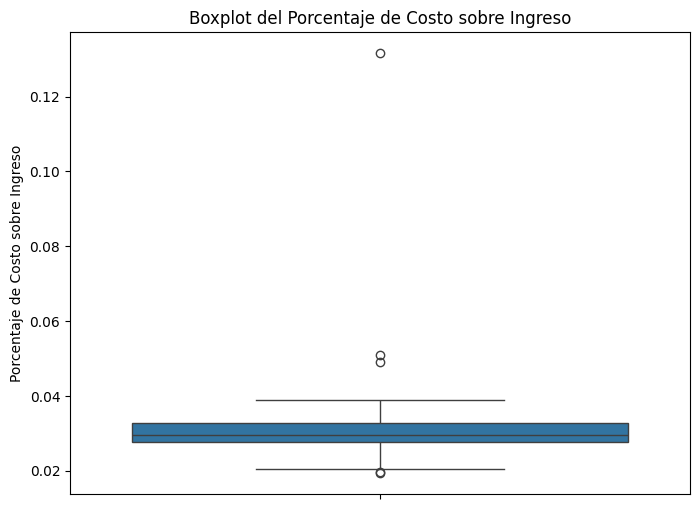

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to identify dispersion and potential outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()


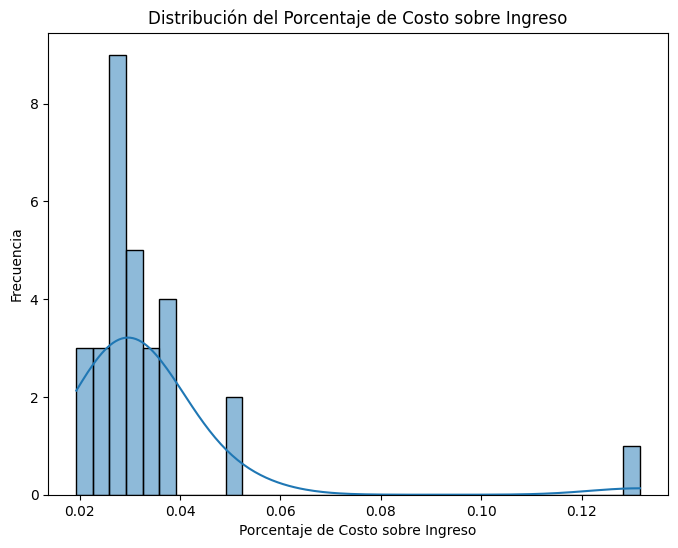

In [61]:

# Histogram to see the distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

##ETAPA 3: 1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.


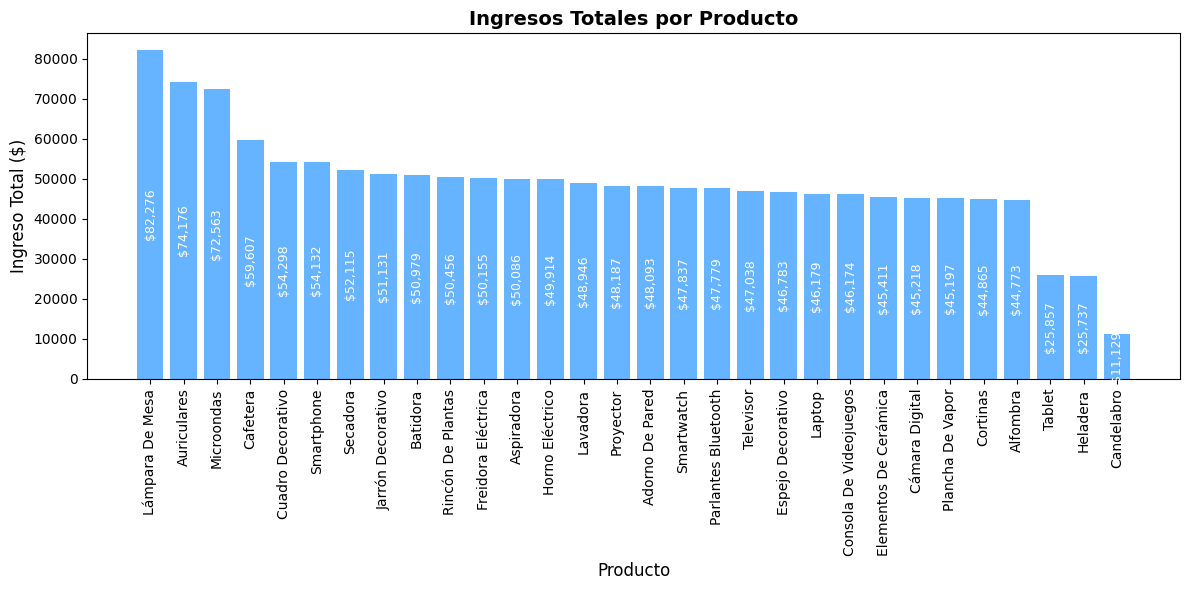

In [63]:
# el df que obtuvimos arriba resumen_prod, tiene un agrupado por producto con ingreso_total por producto, realizamos un grafico
df = resumen_prod.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 6))

# Definimos un color celeste agradable para las barras
color_celeste = "#66b3ff"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()



Medidas de tendencia central del Subtotal
Estas medidas describen el valor típico de las ventas:

Media: promedio general.
Mediana: valor central de los datos ordenados.
Moda: valor que más se repite.

In [64]:
media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 48903.117333333335
Mediana: 48140.244999999995
Moda:
0      11128.8
1      25736.8
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45411.09
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47779.46
13    47836.86
14    48093.49
15     48187.0
16    48946.44
17     49913.9
18    50085.86
19    50155.15
20    50456.45
21     50979.2
22    51130.88
23    52115.45
24    54132.44
25     54297.6
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: ingreso_total, dtype: Float64


####Medidas de dispersión: Miden cuánto se alejan los valores entre sí:

####Rango = Máximo − Mínimo
####Varianza = Promedio de las desviaciones cuadradas
####Desviación estándar = Raíz cuadrada de la varianza

#### 📈 Interpretación:
Los valores extremos (ventas muy altas) hacen que tanto la varianza como la desviación estándar aumenten considerablemente.

#### ¿Qué es la desviación estándar?

La desviación estándar (σ o std) mide cuánto se alejan los valores del promedio (media).
Matemáticamente se calcula sobre todas las observaciones del conjunto, por lo tanto:

✅ Sí, incluye los outliers.

In [65]:
rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 71147.58
Varianza: 175975127.6254547
Desviación estándar: 13265.561715413889


In [66]:
print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")


Media de Ingreso Total: 48,903.12
Mediana de Ingreso Total: 48,140.24
Desviación Estándar de Ingreso Total: 13,265.56
Rango de Ingreso Total: 71,147.58


### Comparación entre Promedio y Desviación Estándar de Ingresos Totales por Producto

**Valores Obtenidos:**
- **Media (Promedio):** 48,903.12

- **Mediana:** 48,140.24

- **Desviación Estándar:** 13,265.56

- **Rango:** 71,147.58 (Máximo 82,276.38 - Mínimo 11,128.80)

**Análisis:**

1.  **Media vs. Mediana:**

    El promedio= 48,903.12 y la mediana= 48,140.24 son valores muy cercanos. Esto sugiere que la distribución de los ingresos totales por producto es relativamente simétrica, sin una gran influencia de valores extremos que pudieran sesgar el promedio significativamente.

2.  **Desviación Estándar:**

    La desviación estándar de 13,265.56 indica la dispersión promedio de los ingresos de cada producto con respecto a la media. En relación con la media de $48,903.12, esta desviación es considerable (aproximadamente un 27% de la media).

3.  **Rango:**
    El rango de 71,147.58, que va desde el producto con menores ingresos (11,128.80) hasta el de mayores ingresos (82,276.38), confirma una amplia variabilidad entre los productos.

**Conclusión:**

  Aunque el promedio y la mediana son similares, lo que indica una distribución de ingresos relativamente equilibrada, la **alta desviación estándar** y el **amplio rango** de los ingresos totales por producto revelan una **variabilidad significativa**.

  Esto significa que no todos los productos generan ingresos de manera uniforme. Existen productos con un rendimiento muy superior y otros con un rendimiento considerablemente inferior. Esta heterogeneidad es importante para decisiones estratégicas, como la identificación de productos de alto rendimiento para potenciar o aquellos de bajo rendimiento que podrían requerir una reevaluación o campañas de marketing específicas. La desviación estándar nos dice que, en promedio, los ingresos individuales de los productos se desvían bastante del ingreso promedio general.

## Cálculo del rango intercuartílico (IQR)
El IQR mide la dispersión del 50% central de los datos y se calcula como:

[ IQR = Q3 - Q1 ]

Es menos sensible a los outliers.

✅ Interpretación:
El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.

In [67]:
q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)


Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


## Detección de outliers usando el IQR
Regla general:

Límite inferior = Q1 − 1.5 × IQR
Límite superior = Q3 + 1.5 × IQR

In [68]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004

Outliers detectados:
           producto  ingreso_total  unidades  precio_promedio  registros
3       Auriculares       74175.58       958        76.302727        143
5          Cafetera       59607.31       765        79.046581        117
6        Candelabro        11128.8       160        74.595417         24
14         Heladera        25736.8       330        74.127708         48
19  Lámpara De Mesa       82276.38      1112        72.720625        176
20       Microondas       72562.89       912        79.176000        135
28           Tablet       25856.57       374        71.382586         58


##ETAPA 3: 2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.

In [78]:
ventas = ventas_clean.copy()
clientes = clientes_clean.copy()
marketing = marketing_clean.copy()

ventas = ventas.rename(columns={'fecha_venta': 'fecha'})
ventas['fecha'] = pd.to_datetime(ventas['fecha'])


In [93]:
#Norm Mes
ventas['mes'] = ventas['fecha'].dt.to_period('M').astype(str)


In [94]:
#Norom atributo rpecio
ventas['precio'] = pd.to_numeric(ventas['precio'], errors='coerce')


In [95]:
# Convertir precio a numérico
ventas['precio'] = pd.to_numeric(ventas['precio'], errors='coerce')

# Crear columna mes en formato graficable
ventas['mes'] = ventas['fecha'].dt.to_period('M').astype(str)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


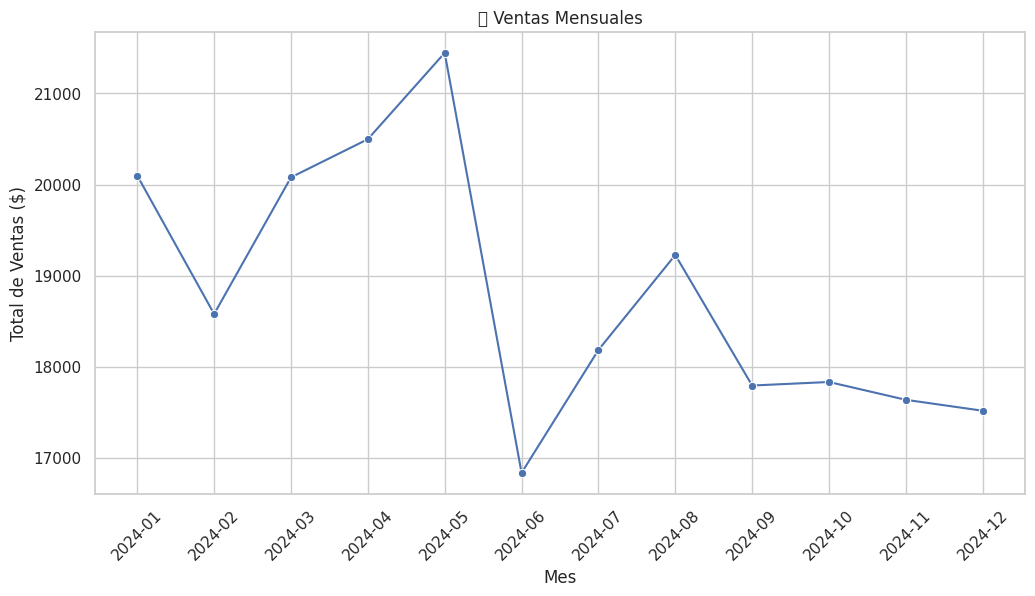

In [96]:
ventas_mensuales = ventas.groupby('mes')['precio'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_mensuales, x='mes', y='precio', marker='o')
plt.title("Evol Ventas Mensuales")
plt.xlabel("Mes")
plt.ylabel("Total de Ventas ($)")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


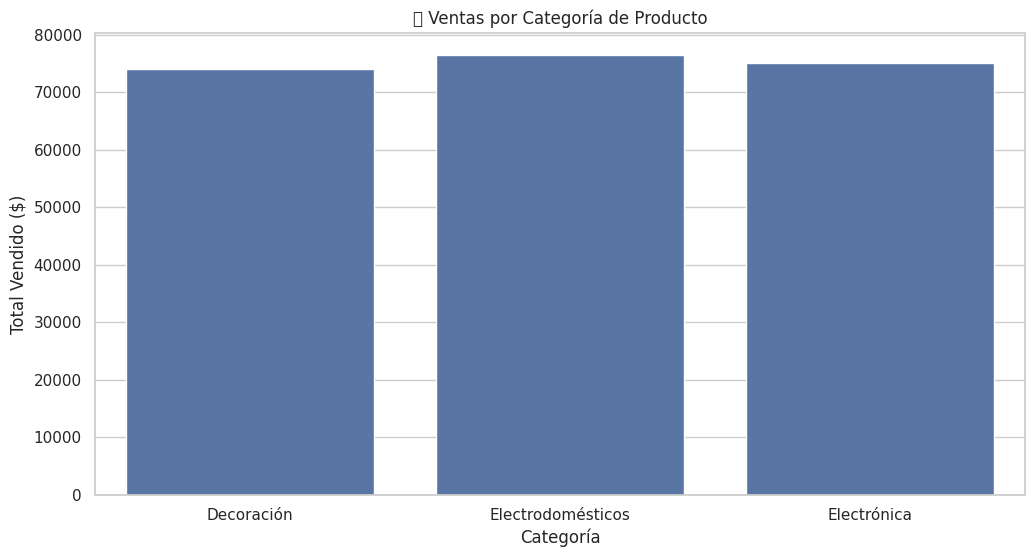

In [97]:
ventas_categoria = ventas.groupby('categoria')['precio'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=ventas_categoria, x='categoria', y='precio')
plt.title(" Ventas por Categoría de Producto")
plt.xlabel("Categoría")
plt.ylabel("Total Vendido ($)")
plt.show()